In [1]:
import pandas as pd
from ML_GRB import ML_GRB, RND_FOREST

In [2]:
dir_path = ''       # directory path

obj = ML_GRB()      # initializing the main class ---> see ML_GRB.py
obj.DataReading(dir_path)       # reading the data ---> see functions.py

In [3]:
obj.DatasetExtrapolation()
dataset = obj.dataset

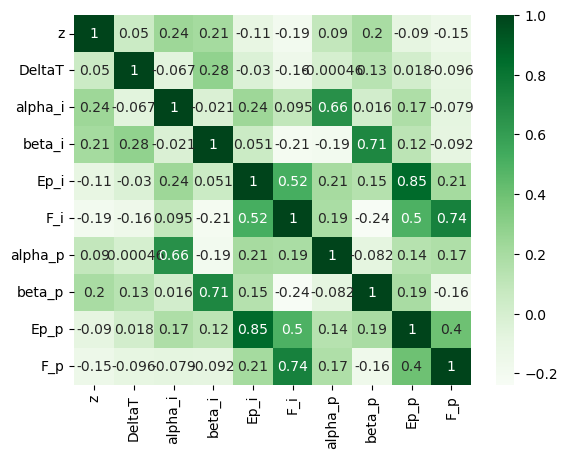

In [4]:
import matplotlib.pyplot as plt

obj.CorrMatrix(dataset)
plt.savefig(dir_path + 'images/DatasetCorrMatrix.png')

In [5]:
# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

# Fitting the model ---> see functions.py
obj.model.Run(dataset, train_size = 0.8, random_state = 42,
              n_estimators = 500, max_depth = 20)

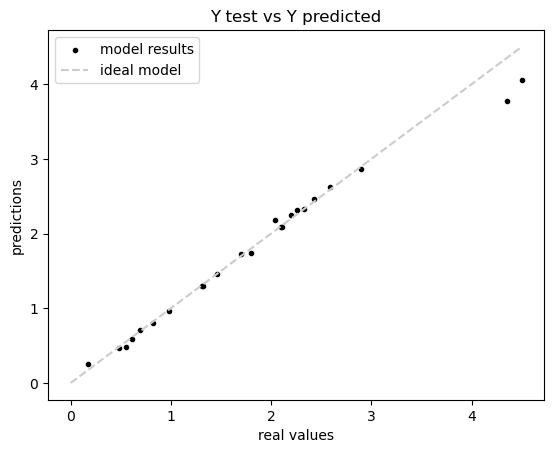

The test score is : 0.979 while the train score is: 0.993


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Printing the results
test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
train_score = obj.model.forest.score(obj.model.X_train, obj.model.y_train)

fig, ax = plt.subplots()
ax.set(title = 'Y test vs Y predicted', 
       xlabel = 'real values', 
       ylabel = 'predictions')

ax.scatter(obj.model.y_test, obj.model.y_pred, color='k', marker='.', label='model results')

x_values = np.linspace(0, 4.5, 100)
ax.plot(x_values, x_values, color='0.8', linestyle = '--', label='ideal model')

ax.legend(loc='best')
plt.show()
    
print('The test score is : {:.3f} while the train score is: {:.3f}'.format(test_score, train_score))

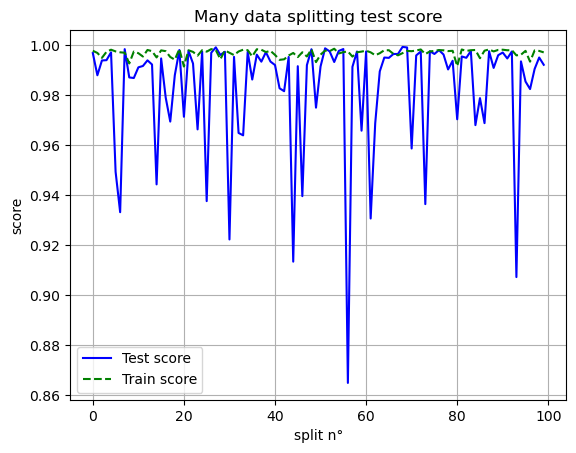

In [13]:
# let's try a loop

# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

test_scores = []
train_scores = []
for i in range(100):
    # Fitting the model ---> see functions.py
    obj.model.Run(dataset, train_size = 0.8,
                  n_estimators = 500, max_depth = 20, random_state = i)

    test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
    train_score = obj.model.forest.score(obj.model.X_train, obj.model.y_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)
    
fig, ax = plt.subplots()
ax.set(
    title = 'Many data splitting test score', 
    xlabel = 'split n°', 
    ylabel = 'score'
)
for model, color, style, label in zip([test_scores, train_scores], ['b', 'g'], ['-', '--'], ['Test score', 'Train score']):
    ax.plot(range(len(model)), model, style, color=color, label=label)
ax.grid()
ax.legend(loc='best')
plt.show()

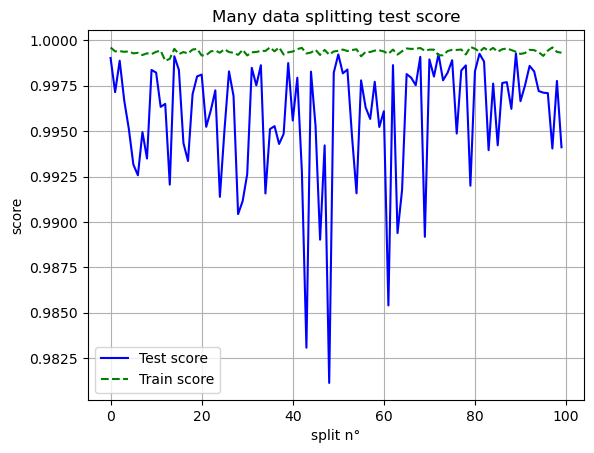

In [14]:
# Let's try for the sport to drop the values of redshift > 3

# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

dataset = dataset[dataset['z'] < 3]     # taking the data with z < 3 for a test

test_scores = []
train_scores = []
for i in range(100):
    # Fitting the model ---> see functions.py
    obj.model.Run(dataset, train_size = 0.8,
                  n_estimators = 500, max_depth = 20, random_state = i)

    test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
    train_score = obj.model.forest.score(obj.model.X_train, obj.model.y_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)
    
fig, ax = plt.subplots()
ax.set(
    title = 'Many data splitting test score', 
    xlabel = 'split n°', 
    ylabel = 'score'
)
for model, color, style, label in zip([test_scores, train_scores], ['b', 'g'], ['-', '--'], ['Test score', 'Train score']):
    ax.plot(range(len(model)), model, style, color=color, label=label)
ax.grid()
ax.legend(loc='best')
plt.show()

WOW